In [17]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import time

# import and reshape data
class CTDataset(Dataset):
    def __init__(self, filepath):
        self.x, self.y = torch.load(filepath)
        self.x = self.x / 255.
        self.y = F.one_hot(self.y, num_classes=10).to(float)
    def __len__(self):
        return self.x.shape[0]
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

train_ds = CTDataset('training.pt')
test_ds = CTDataset('test.pt')

# specify the batch size
train_dl = DataLoader(train_ds, batch_size=5)
for x, y in train_dl:
    print(x.shape)
    print(y.shape)
    break

# build the CNN
L = nn.CrossEntropyLoss()
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2,100)
        self.Matrix2 = nn.Linear(100,50)
        self.Matrix3 = nn.Linear(50,10)
        self.R = nn.ReLU()
    def forward(self,x):
        x = x.view(-1,28**2)
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        return x.squeeze()
f = MyNeuralNet()

# training the module
def train_model(dl, f, n_epochs=20):
    # Optimization
    opt = SGD(f.parameters(), lr=0.01)
    L = nn.CrossEntropyLoss()

    # Train model
    losses = []
    epochs = []
    start_time = time.time()
    for epoch in range(n_epochs):
        print(f'Epoch {epoch}')
        N = len(dl)
        for i, (x, y) in enumerate(dl):
            # Update the weights of the network
            opt.zero_grad()
            loss_value = L(f(x), y)
            loss_value.backward()
            opt.step()
            # Store training data
            epochs.append(epoch+i/N)
            losses.append(loss_value.item())
        spend_time = time.time() - start_time
        print(spend_time)
    return np.array(epochs), np.array(losses)
epoch_data, loss_data = train_model(train_dl, f)

# calculate and plot the loss function
epoch_data_avgd = epoch_data.reshape(20,-1).mean(axis=1)
loss_data_avgd = loss_data.reshape(20,-1).mean(axis=1)

plt.plot(epoch_data_avgd, loss_data_avgd, 'o--')
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (avgd per epoch)')


torch.Size([5, 28, 28])
torch.Size([5, 10])
Epoch 0
9.43358302116394
Epoch 1
18.417187929153442
Epoch 2
27.333997011184692
Epoch 3
36.31396794319153
Epoch 4
45.27228403091431
Epoch 5
54.25014114379883
Epoch 6
63.251312017440796
Epoch 7
72.21309399604797
Epoch 8
81.18828797340393
Epoch 9
90.15112900733948
Epoch 10
99.10156583786011
Epoch 11
108.04682803153992
Epoch 12
116.98605990409851
Epoch 13
125.91970610618591
Epoch 14
134.88439798355103
Epoch 15
143.82801699638367
Epoch 16
152.75791096687317
Epoch 17
161.71786403656006
Epoch 18
170.82706809043884
Epoch 19
179.76101279258728


Text(0.5, 1.0, 'Cross Entropy (avgd per epoch)')

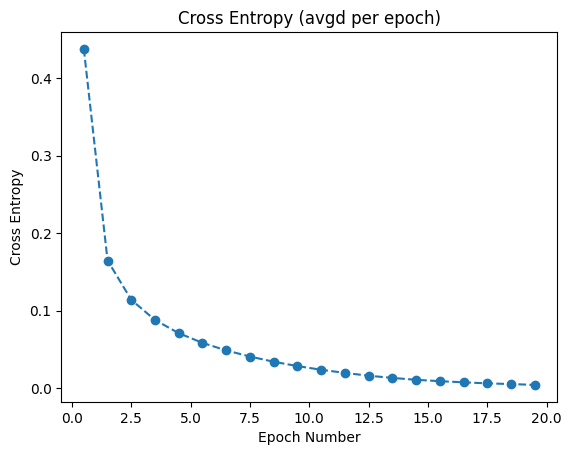

In [18]:
# calculate and plot the loss function
epoch_data_avgd = epoch_data.reshape(20,-1).mean(axis=1)
loss_data_avgd = loss_data.reshape(20,-1).mean(axis=1)

plt.plot(epoch_data_avgd, loss_data_avgd, 'o--')
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (avgd per epoch)')

In [29]:
# test the classification
xs, ys = train_ds[0:100]
yhats = f(xs).argmax(axis=1)
y.label = ys.argmax(axis=1)
score = 0
for i in range(len(y.label)):
    if y.label[i] == yhats[i]:
        score += 1
    else:
        pass
print(score)
#Accuracy = score / 100
#print(Accuracy)

9959


In [30]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import time

# import and reshape data
class CTDataset(Dataset):
    def __init__(self, filepath):
        self.x, self.y = torch.load(filepath)
        self.x = self.x / 255.
        self.y = F.one_hot(self.y, num_classes=10).to(float)
    def __len__(self):
        return self.x.shape[0]
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

train_ds = CTDataset('training.pt')
test_ds = CTDataset('test.pt')

# specify the batch size
train_dl = DataLoader(train_ds, batch_size=5)
for x, y in train_dl:
    print(x.shape)
    print(y.shape)
    break

# build the CNN
L = nn.CrossEntropyLoss()
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2,100)
        self.Matrix2 = nn.Linear(100,50)
        self.Matrix3 = nn.Linear(50,10)
        self.R = nn.ReLU()
    def forward(self,x):
        x = x.view(-1,28**2)
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.Matrix3(x)
        return x.squeeze()
f = MyNeuralNet()

# training the module
def train_model(dl, f, n_epochs=20):
    # Optimization
    opt = SGD(f.parameters(), lr=0.01)
    L = nn.CrossEntropyLoss()

    # Train model
    losses = []
    epochs = []
    xs, ys = train_ds[0:100]
    start_time = time.time()
    for epoch in range(n_epochs):
        print(f'Epoch {epoch}')
        N = len(dl)
        for i, (x, y) in enumerate(dl):
            # Update the weights of the network
            opt.zero_grad()
            loss_value = L(f(x), y)
            loss_value.backward()
            opt.step()
            # Store training data
            epochs.append(epoch+i/N)
            losses.append(loss_value.item())
        spend_time = time.time() - start_time
        yhats = f(xs).argmax(axis=1)
        y.label = ys.argmax(axis=1)
        score = 0
        for i in range(len(y.label)):
            if y.label[i] == yhats[i]:
                score += 1
            else:
                pass
        print(spend_time)
        accuracy = score / 100
        print(accuracy)
    return np.array(epochs), np.array(losses)
epoch_data, loss_data = train_model(train_dl, f)


torch.Size([5, 28, 28])
torch.Size([5, 10])
Epoch 0
9.520983934402466
0.95
Epoch 1
18.320766925811768
0.96
Epoch 2
27.321765899658203
0.98
Epoch 3
37.45834398269653
0.99
Epoch 4
46.34311294555664
0.99
Epoch 5
55.20353293418884
0.99
Epoch 6
64.27454090118408
0.99
Epoch 7
73.05007791519165
0.99
Epoch 8
81.8248598575592
0.99
Epoch 9
90.61973786354065
1.0
Epoch 10
99.43527698516846
0.99
Epoch 11
108.21873188018799
1.0
Epoch 12
116.99415183067322
0.99
Epoch 13
125.76115489006042
1.0
Epoch 14
134.57095289230347
1.0
Epoch 15
143.3565638065338
1.0
Epoch 16
152.12336468696594
1.0
Epoch 17
160.92607378959656
1.0
Epoch 18
169.6840798854828
1.0
Epoch 19
178.4757719039917
1.0


torch.Size([5, 28, 28])
torch.Size([5, 10])
Epoch 0
11.389256000518799
0.97
Epoch 1
21.984976053237915
0.98
Epoch 2
32.602248191833496
0.98
Epoch 3
43.22615313529968
0.99
Epoch 4
53.83144211769104
0.99
Epoch 5
64.43931293487549
0.99
Epoch 6
75.07349491119385
0.99
Epoch 7
85.9686849117279
0.99
Epoch 8
96.69244718551636
0.99
Epoch 9
107.58157300949097
0.99
Epoch 10
118.19660997390747
1.0
Epoch 11
128.7747848033905
0.98
Epoch 12
139.41406297683716
0.98
Epoch 13
150.03572297096252
1.0
Epoch 14
160.63694310188293
1.0
Epoch 15
171.2668309211731
1.0
Epoch 16
181.8822340965271
1.0
Epoch 17
192.5155529975891
0.98
Epoch 18
203.11967086791992
1.0
Epoch 19
213.73056197166443
1.0


Text(0.5, 1.0, 'Cross Entropy (avgd per epoch)')

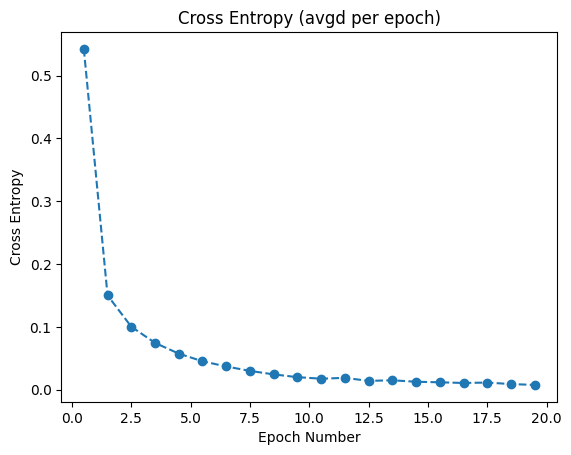

In [32]:
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import time

# import and reshape data
class CTDataset(Dataset):
    def __init__(self, filepath):
        self.x, self.y = torch.load(filepath)
        self.x = self.x / 255.
        self.y = F.one_hot(self.y, num_classes=10).to(float)
    def __len__(self):
        return self.x.shape[0]
    def __getitem__(self, ix):
        return self.x[ix], self.y[ix]

train_ds = CTDataset('training.pt')
test_ds = CTDataset('test.pt')

# specify the batch size
train_dl = DataLoader(train_ds, batch_size=5)
for x, y in train_dl:
    print(x.shape)
    print(y.shape)
    break

# build the CNN
L = nn.CrossEntropyLoss()
class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.Matrix1 = nn.Linear(28**2,150)
        self.Matrix2 = nn.Linear(150,100)
        self.Matrix3 = nn.Linear(100,50)
        self.Matrix4 = nn.Linear(50,10)
        self.R = nn.ReLU()
    def forward(self,x):
        x = x.view(-1,28**2)
        x = self.R(self.Matrix1(x))
        x = self.R(self.Matrix2(x))
        x = self.R(self.Matrix3(x))
        x = self.Matrix4(x)
        return x.squeeze()
f = MyNeuralNet()

# training the module
def train_model(dl, f, n_epochs=20):
    # Optimization
    opt = SGD(f.parameters(), lr=0.01)
    L = nn.CrossEntropyLoss()

    # Train model
    losses = []
    epochs = []
    xs, ys = train_ds[0:100]
    start_time = time.time()
    for epoch in range(n_epochs):
        print(f'Epoch {epoch}')
        N = len(dl)
        for i, (x, y) in enumerate(dl):
            # Update the weights of the network
            opt.zero_grad()
            loss_value = L(f(x), y)
            loss_value.backward()
            opt.step()
            # Store training data
            epochs.append(epoch+i/N)
            losses.append(loss_value.item())
        spend_time = time.time() - start_time
        yhats = f(xs).argmax(axis=1)
        y.label = ys.argmax(axis=1)
        score = 0
        for i in range(len(y.label)):
            if y.label[i] == yhats[i]:
                score += 1
            else:
                pass
        print(spend_time)
        accuracy = score / 100
        print(accuracy)
    return np.array(epochs), np.array(losses)
epoch_data, loss_data = train_model(train_dl, f)

# calculate and plot the loss function
epoch_data_avgd = epoch_data.reshape(20,-1).mean(axis=1)
loss_data_avgd = loss_data.reshape(20,-1).mean(axis=1)

plt.plot(epoch_data_avgd, loss_data_avgd, 'o--')
plt.xlabel('Epoch Number')
plt.ylabel('Cross Entropy')
plt.title('Cross Entropy (avgd per epoch)')